# Minju Yu

## Research question/interests

My research question asks: Is there a relationship between personality traits and race?

Previous research shows the relationship between personality traits among various cultures and ethnicity. Cultures and ethnicity influence socialization patterns, which shape some of the variances of personality (Triandis & Suh, 2002). However, limited research investigates the relationship between personality traits and race. Therefore, I would like to investigate the relationship between personality traits and race. I hypothesized that a particular race group would show higher scores on the big five personality traits (extraversion, neuroticism, agreeableness, conscientiousness, openness) than other race groups.

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
df_raw = pd.read_csv("../data/raw/data.csv", sep='\t')
df_raw

,race,age,engnat,gender,hand,source,country,E1,E2,E3,...,O1,O2,O3,O4,O5,O6,O7,O8,O9,O10
0,3,53,1,1,1,1,US,4,2,5,...,4,1,3,1,5,1,4,2,5,5
1,13,46,1,2,1,1,US,2,2,3,...,3,3,3,3,2,3,3,1,3,2
2,1,14,2,2,1,1,PK,5,1,1,...,4,5,5,1,5,1,5,5,5,5
3,3,19,2,2,1,1,RO,2,5,2,...,4,3,5,2,4,2,5,2,5,5
4,11,25,2,2,1,2,US,3,1,3,...,3,1,1,1,3,1,3,1,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19714,11,15,1,2,1,2,SG,1,4,3,...,1,3,5,3,4,1,4,2,5,3
19715,3,37,1,2,1,2,US,2,3,2,...,1,2,3,2,3,3,4,2,3,3
19716,5,16,2,1,1,2,US,2,5,4,...,5,3,1,3,4,1,1,5,5,5
19717,12,16,1,1,1,5,NG,1,4,2,...,3,2,5,3,4,1,5,3,5,5


## Task 1: EDA
Looking at the shape and general trends in the data:

In [32]:
df_raw.shape

(19719, 57)

In [33]:
df_raw.head()

,race,age,engnat,gender,hand,source,country,E1,E2,E3,...,O1,O2,O3,O4,O5,O6,O7,O8,O9,O10
0,3,53,1,1,1,1,US,4,2,5,...,4,1,3,1,5,1,4,2,5,5
1,13,46,1,2,1,1,US,2,2,3,...,3,3,3,3,2,3,3,1,3,2
2,1,14,2,2,1,1,PK,5,1,1,...,4,5,5,1,5,1,5,5,5,5
3,3,19,2,2,1,1,RO,2,5,2,...,4,3,5,2,4,2,5,2,5,5
4,11,25,2,2,1,2,US,3,1,3,...,3,1,1,1,3,1,3,1,5,3


In [34]:
df_raw.columns

Index(['race', 'age', 'engnat', 'gender', 'hand', 'source', 'country', 'E1',
       'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'N1', 'N2', 'N3',
       'N4', 'N5', 'N6', 'N7', 'N8', 'N9', 'N10', 'A1', 'A2', 'A3', 'A4', 'A5',
       'A6', 'A7', 'A8', 'A9', 'A10', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7',
       'C8', 'C9', 'C10', 'O1', 'O2', 'O3', 'O4', 'O5', 'O6', 'O7', 'O8', 'O9',
       'O10'],
      dtype='object')

In [35]:
df_raw.describe()

,race,age,engnat,gender,hand,source,E1,E2,E3,E4,...,O1,O2,O3,O4,O5,O6,O7,O8,O9,O10
count,19719.000000,1.971900e+04,19719.000000,19719.000000,19719.000000,19719.00000,19719.000000,19719.000000,19719.000000,19719.000000,...,19719.000000,19719.000000,19719.000000,19719.000000,19719.000000,19719.000000,19719.000000,19719.000000,19719.000000,19719.000000
mean,5.324205,5.076703e+04,1.365130,1.616918,1.130128,1.95228,2.628937,2.759724,3.416755,3.152036,...,3.692479,2.149653,4.126122,2.079416,3.873016,1.794766,4.072975,3.208023,4.133577,4.004767
std,4.019064,7.121272e+06,0.488796,0.499122,0.413663,1.50477,1.232565,1.313818,1.236820,1.222822,...,1.116302,1.135227,1.006806,1.109751,0.939655,1.068513,0.923595,1.258921,0.982868,0.983729
min,0.000000,1.300000e+01,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,1.800000e+01,1.000000,1.000000,1.000000,1.00000,2.000000,2.000000,3.000000,2.000000,...,3.000000,1.000000,4.000000,1.000000,3.000000,1.000000,4.000000,2.000000,4.000000,3.000000
50%,3.000000,2.200000e+01,1.000000,2.000000,1.000000,1.00000,3.000000,3.000000,4.000000,3.000000,...,4.000000,2.000000,4.000000,2.000000,4.000000,1.000000,4.000000,3.000000,4.000000,4.000000
75%,8.000000,3.100000e+01,2.000000,2.000000,1.000000,2.00000,4.000000,4.000000,4.000000,4.000000,...,5.000000,3.000000,5.000000,3.000000,5.000000,2.000000,5.000000,4.000000,5.000000,5.000000
max,13.000000,1.000000e+09,2.000000,3.000000,3.000000,5.00000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [36]:
df_raw.nunique()

race        14
age        104
engnat       3
gender       4
hand         4
source       5
country    158
E1           6
E2           6
E3           6
E4           6
E5           6
E6           6
E7           6
E8           6
E9           6
E10          6
N1           6
N2           6
N3           6
N4           6
N5           6
N6           6
N7           6
N8           6
N9           6
N10          6
A1           6
A2           6
A3           6
A4           6
A5           6
A6           6
A7           6
A8           6
A9           6
A10          6
C1           6
C2           6
C3           6
C4           6
C5           6
C6           6
C7           6
C8           6
C9           6
C10          6
O1           6
O2           6
O3           6
O4           6
O5           6
O6           6
O7           6
O8           6
O9           6
O10          6
dtype: int64

The following columns are not useful to me and I will remove these in Task 2: age, engnat, gender, hand, source, country.
Examining the race column further:

In [37]:
df_raw.race.unique()

array([ 3, 13,  1, 11,  5,  4,  8,  6,  9,  0, 10,  7, 12,  2],
      dtype=int64)

There are 13 race values; I will rename them using the codebook and categorize/ remove them if needed in Task 2.
Examining personality traits columns further:

In [38]:
df_raw.filter(regex='E').describe()

,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10
count,19719.000000,19719.000000,19719.000000,19719.000000,19719.000000,19719.000000,19719.000000,19719.000000,19719.000000,19719.000000
mean,2.628937,2.759724,3.416755,3.152036,3.432223,2.452609,2.867285,3.376490,3.094275,3.585324
std,1.232565,1.313818,1.236820,1.222822,1.282003,1.241616,1.431814,1.266396,1.396490,1.304571
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,3.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,3.000000
50%,3.000000,3.000000,4.000000,3.000000,4.000000,2.000000,3.000000,3.000000,3.000000,4.000000
75%,4.000000,4.000000,4.000000,4.000000,5.000000,3.000000,4.000000,4.000000,4.000000,5.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


There are 10 extraversion items; I will calculate a total score and create a column for extraversion in Task 2. According to the codebook, certain items are reverse scored; I will manage it in Task 2.

In [39]:
df_raw.filter(regex='N').describe()

,N1,N2,N3,N4,N5,N6,N7,N8,N9,N10
count,19719.000000,19719.000000,19719.000000,19719.000000,19719.000000,19719.000000,19719.000000,19719.000000,19719.000000,19719.000000
mean,3.262082,3.234596,3.842690,2.756276,2.951722,2.980374,3.151935,2.803235,3.135250,2.833764
std,1.308169,1.177018,1.138854,1.220964,1.272889,1.320437,1.299910,1.350648,1.298573,1.313036
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,3.000000,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


There are 10 neuroticism items; I will calculate a total score and create a column for neuroticism in Task 2. According to the codebook, certain items are reverse scored; I will manage it in Task 2.

In [40]:
df_raw.filter(regex='A').describe()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10
count,19719.000000,19719.000000,19719.000000,19719.000000,19719.000000,19719.000000,19719.000000,19719.000000,19719.000000,19719.000000
mean,2.312085,3.926568,2.162736,4.030073,2.165982,3.896090,2.160657,3.766469,3.944723,3.682337
std,1.369347,1.078510,1.216013,1.045403,1.141783,1.130453,1.132133,1.035959,1.085496,1.052679
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,3.000000,1.000000,4.000000,1.000000,3.000000,1.000000,3.000000,3.000000,3.000000
50%,2.000000,4.000000,2.000000,4.000000,2.000000,4.000000,2.000000,4.000000,4.000000,4.000000
75%,3.000000,5.000000,3.000000,5.000000,3.000000,5.000000,3.000000,5.000000,5.000000,5.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


There are 10 agreeableness items; I will calculate a total score and create a column for agreeableness in Task 2. According to the codebook, certain items are reverse scored; I will manage it in Task 2.

In [41]:
df_raw.filter(regex='C').describe()

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10
count,19719.000000,19719.000000,19719.000000,19719.000000,19719.000000,19719.000000,19719.000000,19719.000000,19719.000000,19719.000000
mean,3.318475,2.978802,3.983011,2.654242,2.700390,2.922866,3.646686,2.481363,3.224454,3.637203
std,1.099567,1.367266,1.003021,1.243191,1.249686,1.399246,1.152740,1.132936,1.246245,1.012663
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,2.000000,3.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000
50%,3.000000,3.000000,4.000000,3.000000,3.000000,3.000000,4.000000,2.000000,3.000000,4.000000
75%,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,3.000000,4.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


There are 10 conscientiousness items; I will calculate a total score and create a column for conscientiousness in Task 2. According to the codebook, certain items are reverse scored; I will manage it in Task 2.

In [42]:
df_raw.filter(regex='O').describe()

,O1,O2,O3,O4,O5,O6,O7,O8,O9,O10
count,19719.000000,19719.000000,19719.000000,19719.000000,19719.000000,19719.000000,19719.000000,19719.000000,19719.000000,19719.000000
mean,3.692479,2.149653,4.126122,2.079416,3.873016,1.794766,4.072975,3.208023,4.133577,4.004767
std,1.116302,1.135227,1.006806,1.109751,0.939655,1.068513,0.923595,1.258921,0.982868,0.983729
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,1.000000,4.000000,1.000000,3.000000,1.000000,4.000000,2.000000,4.000000,3.000000
50%,4.000000,2.000000,4.000000,2.000000,4.000000,1.000000,4.000000,3.000000,4.000000,4.000000
75%,5.000000,3.000000,5.000000,3.000000,5.000000,2.000000,5.000000,4.000000,5.000000,5.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


There are 10 openness items; I will calculate a total score and create a column for openness in Task 2. According to the codebook, certain items are reverse scored; I will manage it in Task 2.

I am interested in the relationship between race and personality traits, so I will do a few plots to get a visual idea of the trends:

array([[<AxesSubplot: title={'center': '0'}>,
        <AxesSubplot: title={'center': '1'}>,
        <AxesSubplot: title={'center': '2'}>,
        <AxesSubplot: title={'center': '3'}>],
       [<AxesSubplot: title={'center': '4'}>,
        <AxesSubplot: title={'center': '5'}>,
        <AxesSubplot: title={'center': '6'}>,
        <AxesSubplot: title={'center': '7'}>],
       [<AxesSubplot: title={'center': '8'}>,
        <AxesSubplot: title={'center': '9'}>,
        <AxesSubplot: title={'center': '10'}>,
        <AxesSubplot: title={'center': '11'}>],
       [<AxesSubplot: title={'center': '12'}>,
        <AxesSubplot: title={'center': '13'}>, <AxesSubplot: >,
        <AxesSubplot: >]], dtype=object)

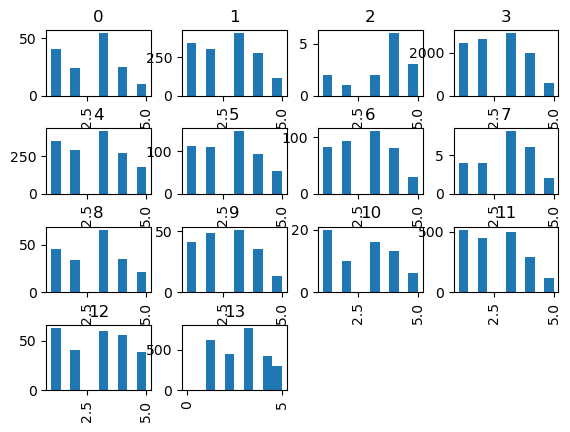

In [43]:
df_raw.hist(column= "E1", by = "race")

This plot shows the distribution of one item of extraversion for all races. Some races seem to have a similar trend of increasing and then decreasing extraversion scores; however, it is hard to distinguish the difference. I will not be likely to use this plot to analyze the data.

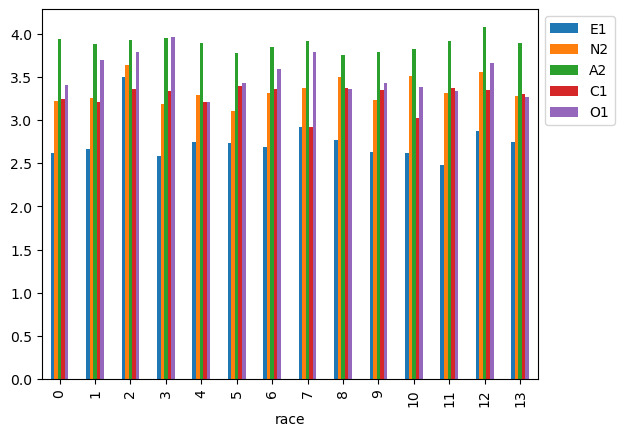

In [44]:
df_raw_eda = df_raw[['race','E1','N2','A2','C1','O1']].copy()
bargraph_eda = df_raw_eda.groupby('race').mean().plot.bar()
plt.legend(bbox_to_anchor=(1.0,1.0))

This plot shows the mean average for one item of each personality trait, separated by race. All races seem to have the highest score on agreeableness and the lowest score on extraversion.

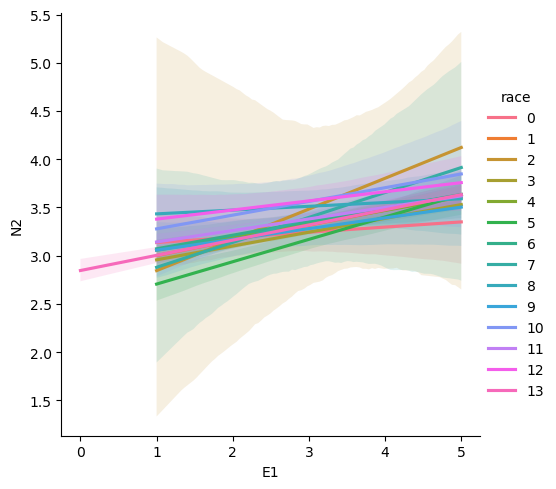

In [45]:
sns.lmplot(df_raw, x='E1', y='N2', hue='race', scatter=False)

This plot shows the relationship between one item of neuroticism and extraversion for all races. Most races seem to have a weak positive relationship between neuroticism and extraversion.

In [ ]:
sns.lmplot(df_raw, x='E1', y='A2', hue='race', scatter=False)

# This plot shows the relationship between one item of agreeableness and extraversion for all races.
# Most races seem to have a weak positive relationship between agreeableness and extraversion.

In [ ]:
sns.lmplot(df_raw, x='E1', y='C1', hue='race', scatter=False)

# This plot shows the relationship between one item of conscientiousness and extraversion for all races.
# The relationship between conscientiousness and extraversion varies among races; it would be interesting to take a closer look at this relationship.

In [ ]:
sns.lmplot(df_raw, x='E1', y='O1', hue='race', scatter=False)

# This plot shows the relationship between one item of openness and extraversion for all races.
# Most races seem to have no relationship between openness and extraversion.

In [ ]:
sns.lmplot(df_raw, x='N2', y='A2', hue='race', scatter=False)

# This plot shows the relationship between one item of agreeableness and neuroticism for all races.
# All races seem to have a weak positive relationship between agreeableness and neuroticism.

In [ ]:
sns.lmplot(df_raw, x='N2', y='C1', hue='race', scatter=False)

# This plot shows the relationship between one item of conscientiousness and neuroticism for all races.
# All races seem to have a weak positive relationship between conscientiousness and neuroticism.

In [ ]:
sns.lmplot(df_raw, x='N2', y='O1', hue='race', scatter=False)

# This plot shows the relationship between one item of openness and neuroticism for all races.
# Most races seem to have no relationship between openness and neuroticism.

In [ ]:
sns.lmplot(df_raw, x='A2', y='C1', hue='race', scatter=False)

# This plot shows the relationship between one item of conscientiousness and agreeableness for all races.
# Most races seem to have a weak positive relationship between conscientiousness and agreeableness.

In [ ]:
sns.lmplot(df_raw, x='A2', y='O1', hue='race', scatter=False)

# This plot shows the relationship between one item of openness and agreeableness for all races.
# Most races seem to have no relationship between openness and agreeableness.

In [ ]:
sns.lmplot(df_raw, x='C1', y='O1', hue='race', scatter=False)

# This plot shows the relationship between one item of openness and conscientiousness for all races.
# Most races seem to have a weak positive relationship between openness and conscientiousness.

I now have a good idea of the trends in the data relevant to my research question. There seems to be no significant relationship between personality traits and race.

## Task 2: Data Analysis Pipeline